### Importing Relevant Liberaries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

### Extract the data from the csv

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/NijatZeynalov/Predict-House-Price-using-ANNs/master/kc_house_dataset.csv")

In [3]:
# ANALYZING DATA
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# Getting total no. of Rows and columns
data.shape

(21613, 21)

In [5]:
# Describing Data Statistcs
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [6]:
# Selecting limited number of Features on basic knowledge and including others as well if needed in future
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [8]:
FullData = data[selected_features]
FullData['price'] = data['price']
FullData.head(5)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,3,1.00,1180,5650,1.0,1180,0,221900.0
1,3,2.25,2570,7242,2.0,2170,400,538000.0
2,2,1.00,770,10000,1.0,770,0,180000.0
3,4,3.00,1960,5000,1.0,1050,910,604000.0
4,3,2.00,1680,8080,1.0,1680,0,510000.0


# PREPROCESSING

### Exploring the descriptive statistics of the variables¶

In [9]:
FullData.describe(include='all')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,7.700000e+06


In [10]:
data = FullData.copy()

In [11]:
# NOW the question arise
# 1. Do you think any house with NO or 0 bedrooms ?
# 2. Or How can be 33 Bedroom present in the house if it is not HAVELI :-p ?? Funny right...now we need to deal with those OUTLIERS also.

### Total missing values

In [12]:
data.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64

In [13]:
# Great we have no null values...Data engineer done very well done job here.. :-P 

### EXPLORING THE PDF

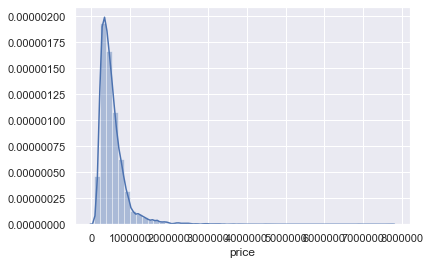

In [14]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['price'])

In [15]:
# WE CAN SEE TO MANY OUTLIERS IN PRICE, SO WE NEED TO GET RID OFF IT

### DEALING WITH OUTLIERS

In [16]:
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

In [17]:
data['price'].quantile(0.95)

1156479.9999999974

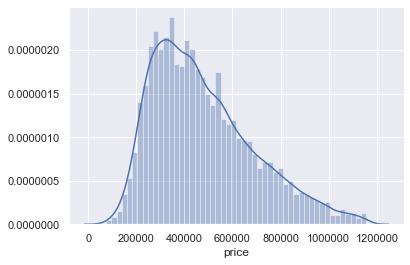

In [18]:
q = data['price'].quantile(0.95)
data_no_outlier_price = data[data['price'] < q]
sns.distplot(data_no_outlier_price['price'])

In [19]:
# LOOKS LIKE LEFT SKEW RIGHT ??

In [20]:
data_no_outlier_price.describe(include="all")

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,20532.000000,20532.000000,20532.000000,2.053200e+04,20532.000000,20532.000000,20532.000000,2.053200e+04
mean,3.332018,2.054622,1981.007160,1.466953e+04,1.476719,1712.650010,268.357150,4.790980e+05
std,0.914429,0.714038,782.339866,4.018539e+04,0.536903,733.236583,410.554601,2.113950e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,7.500000e+04
25%,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,1180.000000,0.000000,3.150000e+05
50%,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,1520.000000,0.000000,4.388500e+05
75%,4.000000,2.500000,2440.000000,1.035000e+04,2.000000,2110.000000,520.000000,6.050000e+05
max,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,7320.000000,2720.000000,1.156000e+06


In [21]:
# NOW WE WILL GO for OTHER VARIABLES

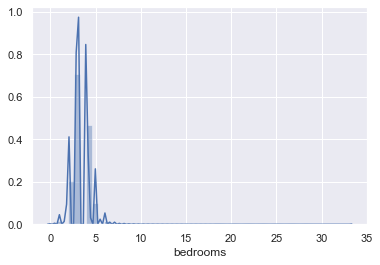

In [22]:
sns.distplot(data_no_outlier_price['bedrooms'])

In [23]:
# Hmm... Outlier there also

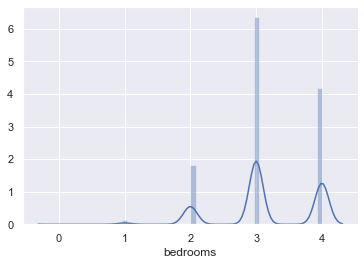

In [24]:
q = data_no_outlier_price['bedrooms'].quantile(0.97)
data_no_outlier_price_bedrooms = data_no_outlier_price[data_no_outlier_price['bedrooms'] < q]
sns.distplot(data_no_outlier_price_bedrooms['bedrooms'])

In [25]:
# remember we saw bedroom with 0, we need to deal with that also

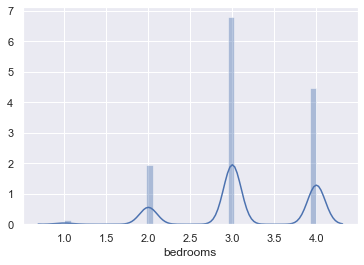

In [26]:
q2 = data_no_outlier_price_bedrooms['bedrooms'].quantile(0.0001)
data_no_outlier_price_bedrooms2 = data_no_outlier_price_bedrooms[data_no_outlier_price_bedrooms['bedrooms'] > q2]
sns.distplot(data_no_outlier_price_bedrooms2['bedrooms'])

In [27]:
data_no_outlier_price_bedrooms2.describe(include='all')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,18892.000000,18892.000000,18892.000000,1.889200e+04,18892.000000,18892.000000,18892.000000,1.889200e+04
mean,3.169966,2.001244,1907.863117,1.453006e+04,1.471708,1669.756246,238.106871,4.693154e+05
std,0.702666,0.680521,734.656444,3.996014e+04,0.540662,704.114130,377.663270,2.067280e+05
min,1.000000,0.000000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,7.500000e+04
25%,3.000000,1.500000,1360.000000,5.000000e+03,1.000000,1150.000000,0.000000,3.100000e+05
50%,3.000000,2.000000,1800.000000,7.465500e+03,1.000000,1480.000000,0.000000,4.300000e+05
75%,4.000000,2.500000,2340.000000,1.022700e+04,2.000000,2040.000000,452.500000,5.900000e+05
max,4.000000,5.250000,6050.000000,1.651359e+06,3.500000,5710.000000,2720.000000,1.156000e+06


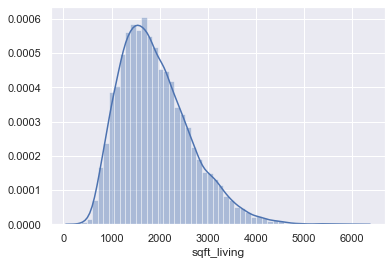

In [28]:
sns.distplot(data_no_outlier_price_bedrooms2['sqft_living'])

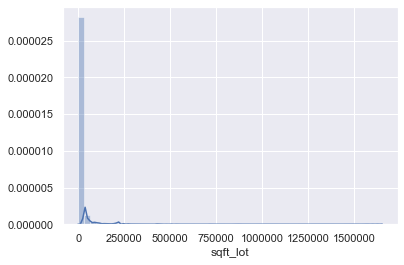

In [29]:
sns.distplot(data_no_outlier_price_bedrooms2['sqft_lot'])

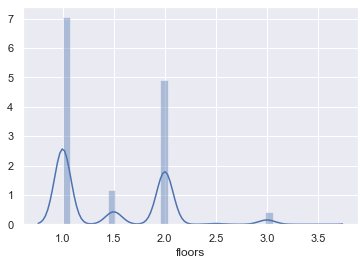

In [30]:
sns.distplot(data_no_outlier_price_bedrooms2['floors'])

In [31]:
# Rest of the other variable looks great, for now we dont need to deal with them....if needed, we will tune them later

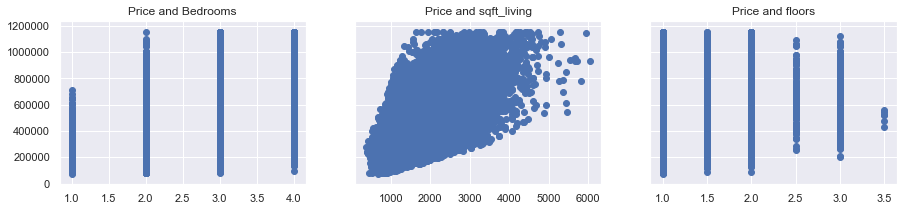

In [32]:
# Here we decided to use some matplotlib code, without explaining it
# WE can simply use plt.scatter() for each of them (with our current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_no_outlier_price_bedrooms2['bedrooms'],data_no_outlier_price_bedrooms2['price'])
ax1.set_title('Price and Bedrooms')
ax2.scatter(data_no_outlier_price_bedrooms2['sqft_living'],data_no_outlier_price_bedrooms2['price'])
ax2.set_title('Price and sqft_living')
ax3.scatter(data_no_outlier_price_bedrooms2['floors'],data_no_outlier_price_bedrooms2['price'])
ax3.set_title('Price and floors')


plt.show()

In [33]:
newdata = data_no_outlier_price_bedrooms2.copy()

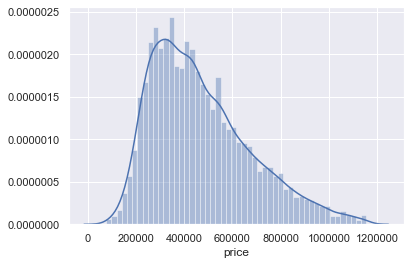

In [34]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(newdata['price'])

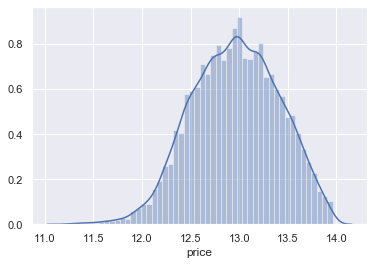

In [35]:
# Let's transform 'Price' with a log transformation
log_price = np.log(newdata['price'])
sns.distplot(log_price)

In [36]:
newdata['logged_price'] = log_price
final_clean_data = newdata.copy()
final_clean_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price,logged_price
0,3,1.00,1180,5650,1.0,1180,0,221900.0,12.309982
1,3,2.25,2570,7242,2.0,2170,400,538000.0,13.195614
2,2,1.00,770,10000,1.0,770,0,180000.0,12.100712
3,4,3.00,1960,5000,1.0,1050,910,604000.0,13.311329
4,3,2.00,1680,8080,1.0,1680,0,510000.0,13.142166
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,360000.0,12.793859
21609,4,2.50,2310,5813,2.0,2310,0,400000.0,12.899220
21610,2,0.75,1020,1350,2.0,1020,0,402101.0,12.904459
21611,3,2.50,1600,2388,2.0,1600,0,400000.0,12.899220


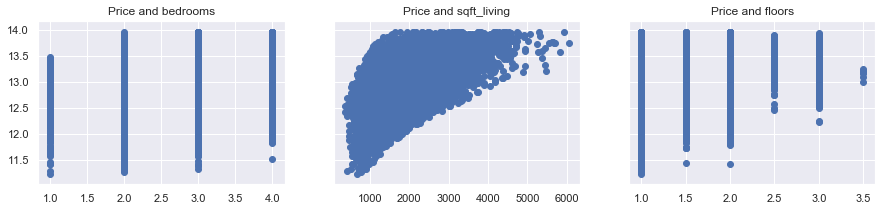

In [37]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(final_clean_data['bedrooms'],final_clean_data['logged_price'])
ax1.set_title('Price and bedrooms')
ax2.scatter(final_clean_data['sqft_living'],final_clean_data['logged_price'])
ax2.set_title('Price and sqft_living')
ax3.scatter(final_clean_data['floors'],final_clean_data['logged_price'])
ax3.set_title('Price and floors')


plt.show()

### MULTICOLLINEARITY

In [38]:
# Let's quickly see the columns of our data frame
final_clean_data.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'price', 'logged_price'],
      dtype=object)

In [39]:
# sklearn does not have a built-in way to check for multicollinearity
# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = final_clean_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]


In [40]:
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [41]:
vif

,VIF,Features
0,14.817726,bedrooms
1,18.495530,bathrooms
2,inf,sqft_living
3,1.179331,sqft_lot
4,inf,sqft_above
5,inf,sqft_basement


In [63]:
# Since bathrooms has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# data_no_multicollinearity = final_clean_data.copy() #<<TESTING PURPOSE
data_no_multicollinearity = final_clean_data.drop(['bathrooms'],axis=1)
data_preprocessed = data_no_multicollinearity.copy()

## LINEAR REGRESSION MODEL

In [43]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['logged_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['logged_price'],axis=1)

In [44]:
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### TRAIN TEST SPLIT

In [46]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### CREATING REGRESSION

In [47]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

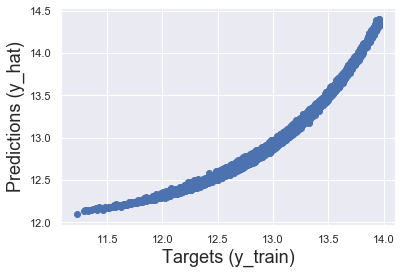

In [49]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

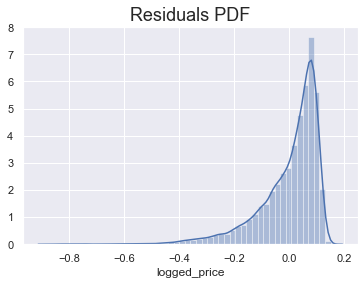

In [50]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [51]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9338885198673126

### TESTING

In [52]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

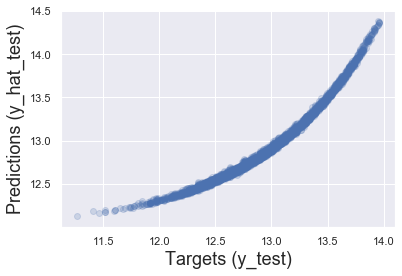

In [53]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [54]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,4.607115e+05
1,1.136504e+06
2,3.277239e+05
3,3.853234e+05
4,8.992158e+05


In [55]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,4.607115e+05,NaN
1,1.136504e+06,NaN
2,3.277239e+05,NaN
3,3.853234e+05,NaN
4,8.992158e+05,NaN
...,...,...
3774,3.554892e+05,NaN
3775,5.084558e+05,NaN
3776,3.718872e+05,NaN
3777,4.863938e+05,NaN


In [56]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    13.122363
1    13.753635
2    12.724569
3    12.938681
4    13.647092
Name: logged_price, dtype: float64

In [57]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,4.607115e+05,500000.0
1,1.136504e+06,940000.0
2,3.277239e+05,335900.0
3,3.853234e+05,416100.0
4,8.992158e+05,845000.0
...,...,...
3774,3.554892e+05,378000.0
3775,5.084558e+05,550000.0
3776,3.718872e+05,400000.0
3777,4.863938e+05,546000.0


In [58]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [59]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4.607115e+05,500000.0,39288.507705,7.857702
1,1.136504e+06,940000.0,-196504.115513,20.904693
2,3.277239e+05,335900.0,8176.064849,2.434077
3,3.853234e+05,416100.0,30776.636139,7.396452
4,8.992158e+05,845000.0,-54215.826312,6.416074
...,...,...,...,...
3774,3.554892e+05,378000.0,22510.849328,5.955251
3775,5.084558e+05,550000.0,41544.153706,7.553482
3776,3.718872e+05,400000.0,28112.843635,7.028211
3777,4.863938e+05,546000.0,59606.207627,10.916888


In [60]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3.779000e+03,3.779000e+03,3779.000000,3779.000000
mean,4.733576e+05,4.708686e+05,-2489.008855,8.855510
std,2.437897e+05,2.064155e+05,71535.303550,9.429136
min,1.854523e+05,7.800000e+04,-625452.546566,0.000872
25%,3.068434e+05,3.100000e+05,-17386.607947,4.014494
50%,3.956956e+05,4.349750e+05,15988.780000,7.197462
75%,5.539615e+05,5.975000e+05,36854.676578,9.736650
max,1.767453e+06,1.156000e+06,75712.802828,137.759385


In [61]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
2004,285002.48,285000.00,-2.48,0.00
3093,718486.55,718500.00,13.45,0.00
2747,280013.54,280000.00,-13.54,0.00
2100,315031.08,315000.00,-31.08,0.01
3369,299030.71,299000.00,-30.71,0.01
...,...,...,...,...
1675,193992.57,100000.00,-93992.57,93.99
413,198548.41,100000.00,-98548.41,98.55
751,190981.65,95000.00,-95981.65,101.03
2916,196553.00,90000.00,-106553.00,118.39


## Conclusion:

In [62]:
# OUR MODEL IS GREAT FOR HIGHER VALUES